# Geometrically and Physically Nonlinear Beam
This sheet is intended as a prelimary lab for the development of a model to solve the issue of column stability with imposed imperfections. And of a geometrically nonlinear beam response with physically nonlinear material behavior.

In [ ]:
import sympy as sp
sp.init_printing()

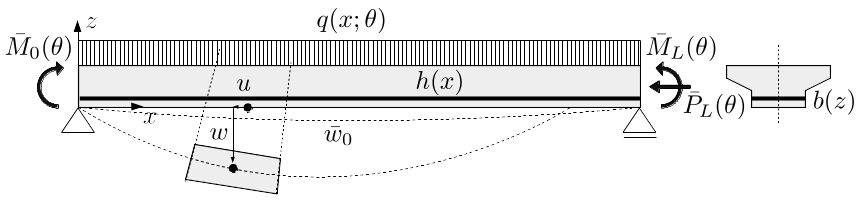

Given a beam of a length $L$ with $x \in (0, L)$ and load control parameter $\theta$ the boundary conditions and loading process is introduced as
\begin{align}
w_{\theta = 0}(x) = \bar{w}_0(x)
\end{align}
where $\bar{w}_0(x)$ represents the shape of the initial imperfection.
Thus, the total deflection $w$ is expressed as
\begin{align}
w = w_{\theta}(x) + \bar{w}_0(x)
\end{align}

In [ ]:
kappa = sp.Symbol('kappa')
eps = sp.Symbol('epsilon')

In [ ]:
z = sp.Symbol('z')
x = sp.Symbol('x')
H = sp.Symbol('H')
B = sp.Function('B')(z)
q = sp.Symbol('q')
u = sp.Function('u')(x)
w = sp.Function('w')(x)

## Kinematics

### Normality of the cross section
We impose the normality constraint by relating the displacements $u(x,z)$ and $w(x,z)$ to the axial displacements of the beam axis $u$ and $w$
\begin{align}
u(x,z) &= u - \frac{ z }{ \sqrt{ w_{,x}^2+1)}} w_{,x}  \\
w(x,z) &= w + \frac{ z }{ \sqrt{ w_{,x}^2+1)}} 
\end{align}

In [ ]:
u_xz = u - z / sp.sqrt(w.diff(x)**2 + 1) * w.diff(x) 
w_xz = w + z / sp.sqrt(w.diff(x)**2 + 1)
u_xz, w_xz

### Strain
To include the whole nonlinear kinematics let us first 
recall the Green Lagrange strain tensor in 3D
\begin{align}
E_{ab} = \frac{1}{2} (u_{a,b}+u_{b,a} + u_{c,a} u_{c,b})
\end{align}
Assuming a stress free state in direction $y, z$ we can set
\begin{align}
E_{22} = E_{33} = E_{23} = E_{32} = 0
\end{align}
Further, assuming a normality of the cross section with respect to deflection line
\begin{align}
E_{12} = E_{21} = 0
\end{align}
Further, the displacement is set to 
\begin{align}
u_1 = u, \; u_2 = 0, u_3 = w
\end{align}
Thus, the normal strain in a cross section of a beam reads
\begin{align}
\varepsilon(x,z) = u_{,x}(x,z) + \frac{1}{2}\left( u_{,x}(x,z) \, w_{,x}(x,z) \right)
\end{align}

In [ ]:
eps_xz = u_xz.diff(x) + 1/2*( u_xz.diff(x) * w_xz.diff(x) )
eps_xz

## Constitutive law
Let us now assume that there is a nonlinear relation between the stress and strain at each ligament of the cross section $x$, i.e.
\begin{align}
\sigma(z) = \varsigma( \varepsilon(z) ) = \varsigma( u_{,x} + z \kappa ) 
\end{align}

In [ ]:
sig_xz = sp.Function('varsigma')(eps_xz)

### Stress resultants
The stress resultants within this cross section read
\begin{align}
M(x) &= \int_{-h/2}^{h/2} \sigma(x,z)\, z \; \mathrm{d}z \\
N(x) &= \int_{-h/2}^{h/2} \sigma(x,z) \; \mathrm{d}z
\end{align}

In [ ]:
M_x = sp.integrate(sig_xz*z, (z,-H/2,H/2))
N_x = sp.integrate(sig_xz, (z,-H/2,H/2))

### Local equilibrium
\begin{align}
M_{,xx}(x) - q(\theta, x) = 0 \\
N_{,x}(x)  = 0
\end{align}
for convenience let us drop the spatial coordinate $x$ for a while
and group the unknown displacement varialbes into a vector
\begin{align}
 v_C = [u, w]
\end{align}
Then, the equilibrium conditions can be expressed as
\begin{align}
M_{,xx}(v_C) - q(\theta) = 0 \\
N_{,x}(v_C)  = 0
\end{align}

In [ ]:
Eq1 = M_x.diff(x,2) - q
Eq2 = N_x.diff(x)

Consider an elastic material law as an example with 
\begin{align}
 \sigma = E \, \varepsilon
\end{align}

In [ ]:
E_ = sp.Symbol('E')
sig_el = E_ * eps_xz
N_x#.subs({sig_xz:sig_el})

In [ ]:
M_x

## Variational formulation
Based on the local differential formulation of the governing equations let us now provide the ansatz space for the approximation of the problem at hand. Instead of integrating the differential equations to solve for the unknown primary variables $u, w$ let us introduce the equilibrium in a weak form by requiring that for any test functions $\hat{u}, \hat{w}$ from the test space implifictly satisfying the essential boundary conditions the following equations hold. 
\begin{align}
\left(\hat{v}, M_{,xx}(v) - \bar{P} w \right)_\Omega +
\left(\hat{v}, N_{,x}(v) - \bar{P} \right)_\Omega = 0
\end{align}
To reduce the order of derivatives let us now employ the integration by parts

### Boundary conditions
Natural and essential boundary conditions are defined in the usual way as
$ u = \bar{u}, \; w = \bar{w}$ on $\Gamma_u$ and 
$ M = \bar{M}, \; N = \bar{N}$ on $\Gamma_\sigma$

### Rotational definition - what is the difference?
Note that the usual definition of the is based on the displacement approximation given by the curvature as
\begin{align}
u(x,z) &= u - z \, w_{,x} \\
\varepsilon(x,z) &= u_{,x}(x,z) = (u_{,x} - z \, w_{,xx}) = \varepsilon - z \, \kappa  
\end{align}

In [ ]:
eps1_xz = u.diff(x) - z * w.diff(x).diff(x)

In [ ]:
eps1_xz

## Example of a deformed shape given by a parametric function $x,z$

In [ ]:
h = 5.0 # beam height
L = 10. # beam length
z_subs = [{z: z_} for z_ in [-h/2, -h/4, 0, h/4, h/2]]
xz = [ 0.5 * x, 0.01*x**2 ]
#xz = [ 0.5 * x, 0*x ]
#xz = [ x, 0.1*x**2 ]
uw_subs = {u:xz[0] - x, w:xz[1]}
sp.plotting.plot_parametric(xz[0], xz[1], (x,0,L));

In [ ]:
u1_xz, w1_xz = u_xz.subs(uw_subs).doit(),  w_xz.subs(uw_subs).doit()
u1_xz, w1_xz

Now, not only the displacement of the middle axis but the $u,w$ displacement of each point within the section can be displayed. Let's do it for the bottom, middle and upper point of the cross sections along the bar.

In [ ]:
x_curves = [((x + u1_xz).subs(z_sub), w1_xz.subs(z_sub)) for z_sub in z_subs] + [(x,0,L)]
sp.plotting.plot_parametric(*x_curves);

In [ ]:
eps1_xz = eps_xz.subs(uw_subs).doit()
x_subs = [{x : x_sub} for x_sub in [0, L/2, L] ]
eps_curves = [eps1_xz.subs(x_sub) for x_sub in x_subs] + [(z,-h/2,h/2)]
sp.plot(*eps_curves);

In [ ]:
eps3d_curves = [
    ((x + u1_xz).subs(z_sub), w1_xz.subs(z_sub), eps1_xz.subs(z_sub), (x,0,L)) 
    for z_sub in z_subs
]
sp.plotting.plot3d_parametric_line(*eps3d_curves);

In [ ]:
sp.plotting.plot3d(eps1_xz, (x,0,10), (z,-h/2,h/2));

Consider a section of a length $L$ and a linear profile of displacements at the left and right end of the section over the cross sectional height, i.e.  
\begin{align}
u_{Ex}(y) &= N_i u_{Ei}(y)
\end{align}
where
\begin{align}
N_i = [ \frac{1}{2} (1 - \xi), \frac{1}{2} (1 + \xi) ]
\end{align}

$$
M(u_{,x}, w_{,xx}) - \bar{P} w = 0 \\
N_{,x}(u_{,x}, w_{,xx}) = 0
$$

$$
\int_{\Omega} \{u, w \} 
\cdot \{ M(u_{,x}, w_{,xx}) - \bar{P} w, \; N_{,x}(u_{,x}, w_{,xx} \}^T \, \mathrm{d}x = 0
$$